## Ch 8 - Broadcast Channels

Reference: Ch 8 of A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011.

Author: Cheuk Ting Li  

In [1]:
from psitip import *
PsiOpts.setting(
    solver = "ortools.GLOP",    # Set linear programming solver
    repr_latex = True,          # Jupyter Notebook LaTeX display
    venn_latex = True,          # LaTeX in diagrams
    proof_note_color = "blue",  # Reasons in proofs are blue
)

### Thm 8.1 (Degraded Message Sets)

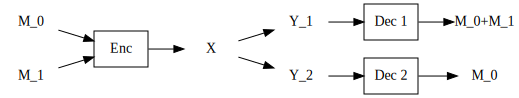

In [2]:
X, U, V = rv("X, U, V")
Y1, Y2 = rv_array("Y", 1, 3)
M0, M1 = rv_array("M", 2)
R0, R1 = real_array("R", 2)

model = CodingModel()     # Degraded message set
model.set_rate(M0, R0)    # Rate of M0 is R0
model.set_rate(M1, R1)    # Rate of M1 is R1
model.add_node(M0+M1, X,
          label = "Enc")  # Encoder maps M0,M1 to X
model.add_edge(X, Y1)     # Channel X -> Y1
model.add_edge(X, Y2)     # Channel X -> Y2
model.add_node(Y1, M0+M1,
        label = "Dec 1")  # Decoder 1 maps Y1 to M0,M1
model.add_node(Y2, M0,
        label = "Dec 2")  # Decoder 2 maps Y2 to M0

model.graph()             # Draw diagram

In [3]:
r = model.get_inner(is_proof=True) # Give superposition region [Bergmans 1973], [Gallager 1974]
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

In [4]:
# Converse proof
model.proof_outer(r)

### Thm 8.2 (3-Receiver Multilevel DM-BC) (Converse only)

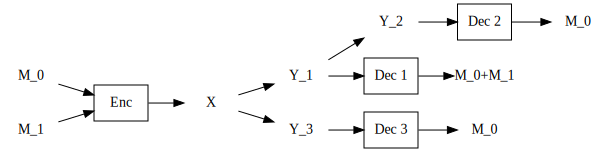

In [5]:
X, U, V = rv("X, U, V")
Y1, Y2, Y3 = rv_array("Y", 1, 4)
M0, M1 = rv_array("M", 2)
R0, R1 = real_array("R", 2)

model = CodingModel()     # Degraded message set
model.set_rate(M0, R0)    # Rate of M0 is R0
model.set_rate(M1, R1)    # Rate of M1 is R1
model.add_node(M0+M1, X,
          label = "Enc")  # Encoder maps M0,M1 to X
model.add_edge(X, Y1)     # Channel X -> Y1
model.add_edge(Y1, Y2)    # Channel Y1 -> Y2
model.add_edge(X, Y3)     # Channel X -> Y3
model.add_node(Y1, M0+M1,
        label = "Dec 1")  # Decoder 1 maps Y to M0,M1
model.add_node(Y2, M0,
        label = "Dec 2")  # Decoder 2 maps Z to M0
model.add_node(Y3, M0,
        label = "Dec 3")  # Decoder 3 maps Z to M0

model.graph()             # Draw diagram

In [6]:
# Capacity region
r = region(
    R0 >= 0,
    R1 >= 0,
    R0 <= I(U & Y2),
    R0 <= I(V & Y3),
    R1 <= I(X & Y1 | U),
    R0 + R1 <= I(V & Y3) + I(X & Y1 | V),
    markov(U, V, X, Y1+Y2+Y3)
).exists(U+V)
r

( ( R_0 >= 0 )
 &( R_1 >= 0 )
 &( R_0 <= I(U&Y_2) )
 &( R_0 <= I(V&Y_3) )
 &( R_1 <= I(X&Y_1|U) )
 &( R_0+R_1 <= I(V&Y_3)+I(X&Y_1|V) )
 &( markov(U, V, X, Y_1+Y_2+Y_3) ) ).exists(U+V)

In [7]:
# Converse proof
model.proof_outer(r)

### Thm 8.3 (Marton's Inner Bound)

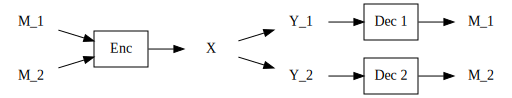

In [8]:
X, U, V = rv("X, U, V")
Y1, Y2 = rv_array("Y", 1, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()     # Define broadcast channel
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M1+M2, X,
          label = "Enc")  # Encoder maps M1,M2 to X
model.add_edge(X, Y1)      # Channel X -> Y1
model.add_edge(X, Y2)      # Channel X -> Y2
model.add_node(Y1, M1,
        label = "Dec 1")  # Decoder 1 maps Y1 to M1
model.add_node(Y2, M2,
        label = "Dec 2")  # Decoder 2 maps Y2 to M2

model.graph()             # Draw diagram

In [9]:
# Automatic inner bound, gives 3-auxiliary Marton's inner bound 
#  [Marton 1979], [Gel'fand-Pinsker 1980], [Liang-Kramer 2007]
r = model.get_inner(is_proof=True)
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

### Thm 8.4 (Marton's Inner Bound w/ Common Message)

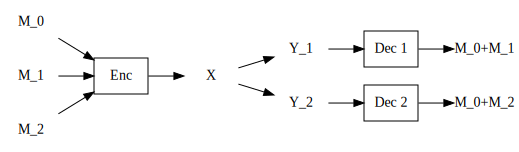

In [10]:
X, U, V = rv("X, U, V")
Y1, Y2 = rv_array("Y", 1, 3)
M0, M1, M2 = rv_array("M", 0, 3)
R0, R1, R2 = real_array("R", 0, 3)

model = CodingModel()     # Define broadcast channel
model.set_rate(M0, R0)    # Rate of M0 is R0
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M0+M1+M2, X,
          label = "Enc")  # Encoder maps M0,M1,M2 to X
model.add_edge(X, Y1)      # Channel X -> Y1
model.add_edge(X, Y2)      # Channel X -> Y2
model.add_node(Y1, M0+M1,
        label = "Dec 1")  # Decoder 1 maps Y1 to M0,M1
model.add_node(Y2, M0+M2,
        label = "Dec 2")  # Decoder 2 maps Y2 to M0,M2

model.graph()             # Draw diagram

In [11]:
# Automatic inner bound
r = model.get_inner(is_proof=True)
r.display(note=True)  # Include reasons in blue

<IPython.core.display.Math object>

### Thm 8.5 (UV Outer Bound)

In [12]:
X, U, V = rv("X, U, V")
Y1, Y2 = rv_array("Y", 1, 3)
M1, M2 = rv_array("M", 1, 3)
R1, R2 = real_array("R", 1, 3)

model = CodingModel()     # Define broadcast channel
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M1+M2, X,
          label = "Enc")  # Encoder maps M1,M2 to X
model.add_edge(X, Y1)      # Channel X -> Y1
model.add_edge(X, Y2)      # Channel X -> Y2
model.add_node(Y1, M1,
        label = "Dec 1")  # Decoder 1 maps Y1 to M1
model.add_node(Y2, M2,
        label = "Dec 2")  # Decoder 2 maps Y2 to M2

In [13]:
# Define UV outer bound [El Gamal 1979], [Nair-El Gamal 2006]
U1, U2 = rv_array("U", 1, 3)
r_uv = region(
    R1 >= 0,
    R2 >= 0,
    R1 <= I(U1 & Y1),
    R2 <= I(U2 & Y2),
    R1+R2 <= I(U1 & Y1) + I(X & Y2 | U1),
    R1+R2 <= I(U2 & Y2) + I(X & Y1 | U2),
    markov(U1+U2, X, Y1+Y2),
    markov(Y1, X, Y2)
).exists(U1+U2)
r_uv

( ( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_1 <= I(U_1&Y_1) )
 &( R_2 <= I(U_2&Y_2) )
 &( R_1+R_2 <= I(U_1&Y_1)+I(X&Y_2|U_1) )
 &( R_1+R_2 <= I(U_2&Y_2)+I(X&Y_1|U_2) )
 &( markov(Y_1, X, Y_2) )
 &( markov(Y_1+Y_2, X, U_1+U_2) ) ).exists(U_1+U_2)

In [14]:
# Converse proof
model.proof_outer(r_uv)

### Thm 8.6 (Nair-El Gamal Outer Bound)

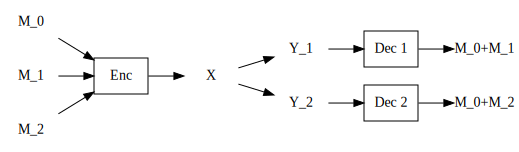

In [15]:
X, U, V = rv("X, U, V")
Y1, Y2 = rv_array("Y", 1, 3)
M0, M1, M2 = rv_array("M", 0, 3)
R0, R1, R2 = real_array("R", 0, 3)

model = CodingModel()     # Define broadcast channel
model.set_rate(M0, R0)    # Rate of M0 is R0
model.set_rate(M1, R1)    # Rate of M1 is R1
model.set_rate(M2, R2)    # Rate of M2 is R2
model.add_node(M0+M1+M2, X,
          label = "Enc")  # Encoder maps M0,M1,M2 to X
model.add_edge(X, Y1)      # Channel X -> Y1
model.add_edge(X, Y2)      # Channel X -> Y2
model.add_node(Y1, M0+M1,
        label = "Dec 1")  # Decoder 1 maps Y1 to M0,M1
model.add_node(Y2, M0+M2,
        label = "Dec 2")  # Decoder 2 maps Y2 to M0,M2

model.graph()             # Draw diagram

In [16]:
# Define Nair-El Gamal outer bound [Nair-El Gamal 2006]
U0, U1, U2 = rv_array("U", 0, 3)
r_n_eg = region(
    R0 >= 0,
    R1 >= 0,
    R2 >= 0,
    R0 <= I(U0 & Y1),
    R0 <= I(U0 & Y2),
    R0 + R1 <= I(U0+U1 & Y1),
    R0 + R2 <= I(U0+U2 & Y2),
    R0 + R1 + R2 <= I(U0+U1 & Y1) + I(U2 & Y2 | U0+U1),
    R0 + R1 + R2 <= I(U0+U2 & Y2) + I(U1 & Y1 | U0+U2),
    bnet((U1+U2, U0), (U0+U1+U2, X), (X, Y1+Y2))
).exists(U0+U1+U2)
r_n_eg

( ( R_0 >= 0 )
 &( R_1 >= 0 )
 &( R_2 >= 0 )
 &( R_0 <= I(U_0&Y_1) )
 &( R_0 <= I(U_0&Y_2) )
 &( R_0+R_1 <= I(U_0+U_1&Y_1) )
 &( R_0+R_2 <= I(U_0+U_2&Y_2) )
 &( R_0+R_1+R_2 <= I(U_0+U_1&Y_1)+I(U_2&Y_2|U_0+U_1) )
 &( R_0+R_1+R_2 <= I(U_0+U_2&Y_2)+I(U_1&Y_1|U_0+U_2) )
 &( indep(U_2, U_1) )
 &( markov(U_2+U_1+U_0, X, Y_2+Y_1) ) ).exists(U_0+U_1+U_2)

In [17]:
# Converse proof
model.proof_outer(r_n_eg)

### References
- A. El Gamal and Y.-H. Kim, _Network Information Theory_, Cambridge University Press, 2011, Ch. 5, 8.
-  K. Marton, "A coding theorem for the discrete memoryless broadcast channel," IEEE Transactions on Information Theory, vol. 25, no. 3, pp. 306–311, May 1979.
- S. I. Gel'fand and M. S. Pinsker, "Capacity of a broadcast channel with one deterministic component," Problemy Peredachi Informatsii, vol. 16, no. 1, pp. 24–34, 1980.
- Y. Liang and G. Kramer, "Rate regions for relay broadcast channels," IEEE Transactions on Information Theory, vol. 53, no. 10, pp. 3517–3535, Oct 2007.
- C. Nair and A. El Gamal, "An outer bound to the capacity region of the broadcast channel," IEEE Transactions on Information Theory, vol. 53, no. 1, pp. 350–355, 2006.
- J. Körner and K. Marton, "Comparison of two noisy channels," Topics in information theory, pp. 411–423, 1977.
- A. El Gamal, "The capacity of a class of broadcast channels," IEEE Transactions on Information Theory, vol. 25, no. 2, pp. 166–169, 1979.
- P. Bergmans, "Random coding theorem for broadcast channels with degraded components," IEEE Transactions on Information Theory, vol. 19, no. 2, pp. 197–207, 1973.
- R. G. Gallager, "Capacity and coding for degraded broadcast channels," Problemy Peredachi Informatsii, vol. 10, no. 3, pp. 3–14, 1974.